- Phạm Hoàn Phúc 52000704
- Nguyễn Hoài Nam 52000688
- Ngô Văn Danh 52100877

## Bài toán classification dự đoán số tuổi của bào ngư
Thông tin dataset: 
- 4177 instance
- 9 feature
- Loại dữ liệu: Categorical, Integer, Real

In [1]:
#import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import tensorflow as tf

### Reading data

In [2]:
#đọc data
filename = 'abalone.data'
data = pd.read_csv(filename)
data.head(4)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10


### Mô tả dữ liệu:
- Sex: M(male), F(female), I(infant)
- Length: Longest shell measurement (mm)
- Diameter: Perpendicular to length (mm)
- Height: With meat in shell (mm)
- Whole_weight: Whole abalone (g)
- Shucked_weight: Weight of meat (g)
- Viscera_weight: Gut weight (after bleeding) (g)
- Shell_weight: After being dried (g)
- Rings (Target): +1.5 gives the age in years

Trong đó Sex là dữ liệu categorical, các feature còn lại có dữ liệu là numerical

### Data progressing

In [3]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [4]:
#mô tả dữ liệu
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
#kiểm tra mất mát dữ liệu
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
#kiểm tra dữ liệu bị trùng lặp
data.duplicated().sum()

0

In [7]:
#mô tả biến mục tiêu
data['Rings'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

### Visualizing dataset

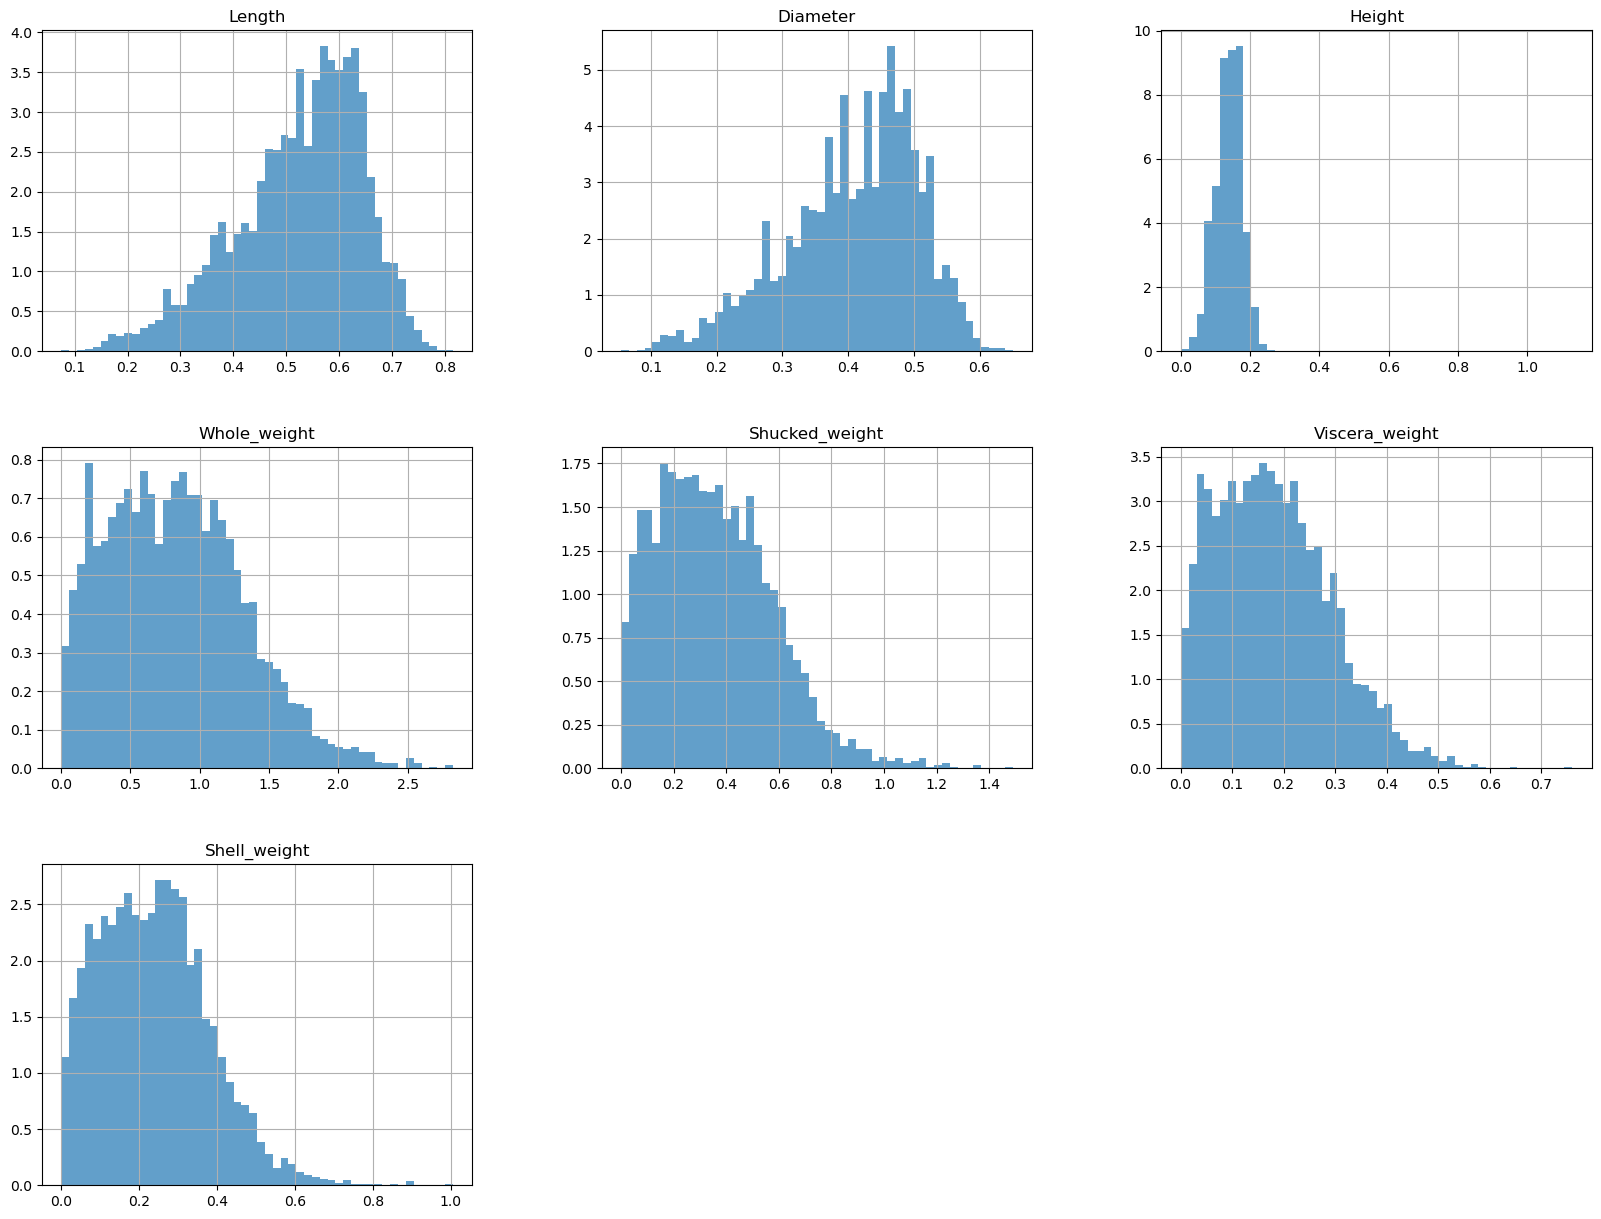

In [8]:
#phân phối của các feature
data.hist(column = ['Length', 'Diameter', 'Height', 'Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'], bins=50, alpha = 0.7,density = 1, figsize=(20, 15))
plt.show()

<Axes: >

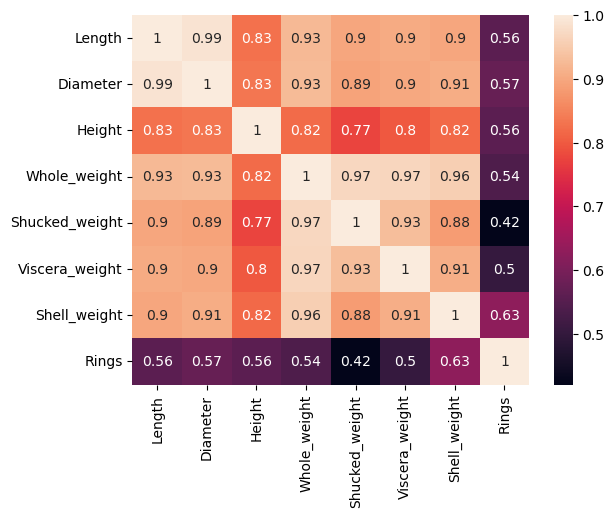

In [9]:
#Phân tích sự tương quan giữa các feature
sns.heatmap(data.corr(numeric_only=True), annot=True)

Có thể thấy Rings có độ tương quan cao nhất với Shell_weight (0.63), các feature khác chênh lệch rất gần nhau lần lược là Diameter (0.57), Length (0.56) và Height (0.56),... và thấp nhất là Sucked_weight (0.42)

Length và Diameter có độ tương quan rất cao với nhau (0.99) bởi lẽ khi bào ngư phát triển thì độ đường kính của nó cũng sẽ phát triển song song với chiều dài

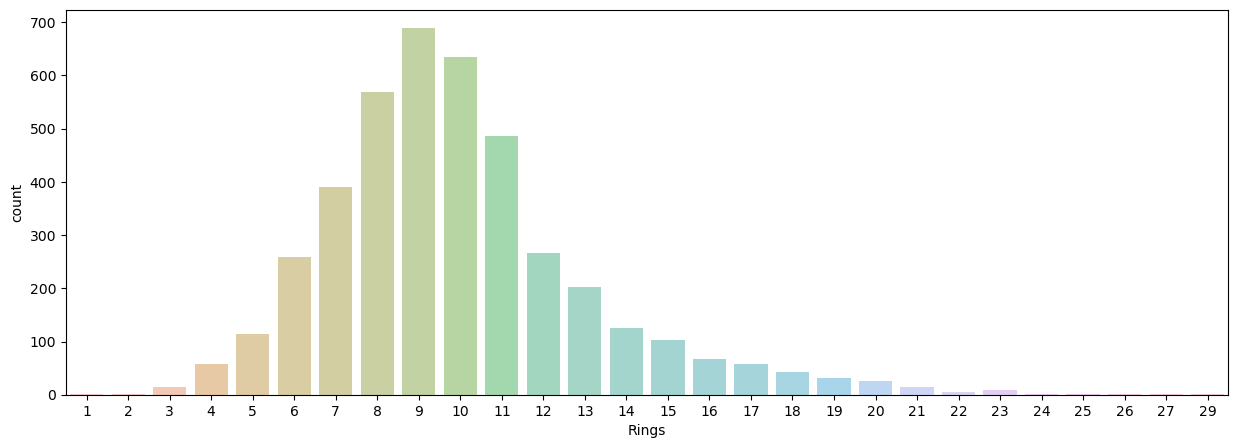

In [10]:
#phân phối của biến mục tiêu (Rings)
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='Rings',data=data,alpha=0.5)

<Axes: xlabel='Sex', ylabel='Count'>

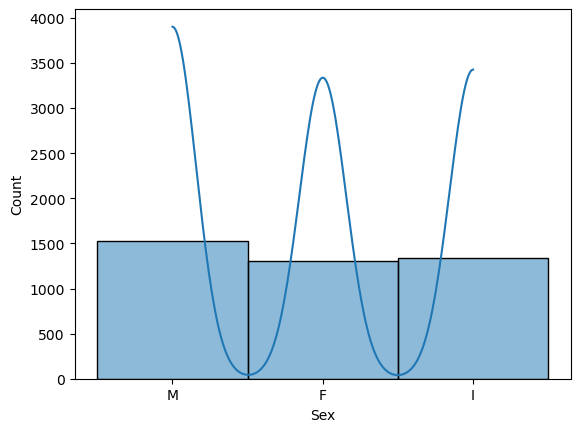

In [11]:
sns.histplot(data = data['Sex'], kde = True)

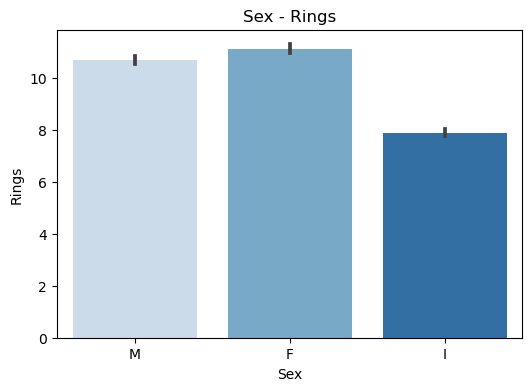

In [12]:
plt.figure(figsize=(6,4))

sns.barplot(x='Sex', y='Rings', data = data, palette='Blues')
plt.title('Sex - Rings')
plt.show()

Có thể thấy bào ngư cái có số vòng cao hơn bào ngư đực và thấp nhất là bào ngư sơ sinh

In [13]:
#Phân loại bào ngư vào 3 nhóm tùy thuộc vào số vòng của chúng
age_label = list()
for rings in data['Rings']:
    if rings <= 8:
        age_label.append('Young')
    elif rings > 8 and rings < 11:
        age_label.append('Middle-aged')
    else:
        age_label.append('Old')
            
# Cập nhật cột này vào dataset
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(age_label, columns=['Age'])], axis=1)

<Axes: xlabel='Age', ylabel='Count'>

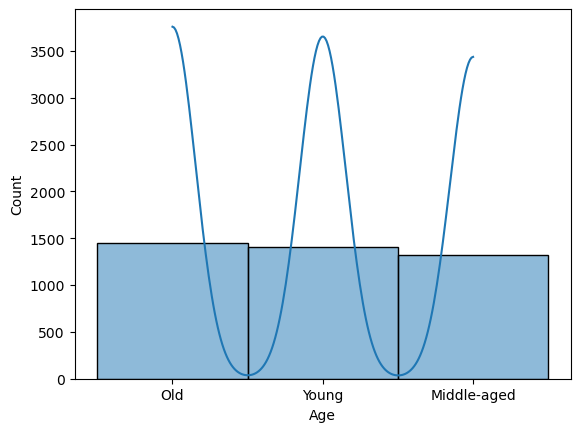

In [14]:
sns.histplot(data = data['Age'], kde = True)

In [15]:
#Data transformation
types = data.dtypes
names = list(data.columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(types)):
    if types[i] == 'object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

In [16]:
#Phân tách X, y
X = data.drop(['Rings', 'Age'], axis=1)
y = data['Age']

X.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### Feature selection

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)

In [19]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [20]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [21]:
featureScores

,Specs,Score
0,Sex,3.141114
1,Length,44.216130
2,Diameter,40.434576
3,Height,17.662870
4,Whole_weight,434.603925
5,Shucked_weight,157.720651
6,Viscera_weight,95.114675
7,Shell_weight,139.233886


In [22]:
print(featureScores.nlargest(5,'Score')) 

            Specs       Score
4    Whole_weight  434.603925
5  Shucked_weight  157.720651
7    Shell_weight  139.233886
6  Viscera_weight   95.114675
1          Length   44.216130


In [23]:
X_new = X.drop(['Height', 'Diameter'], axis=1)    

In [24]:
#Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

scaler.fit(X_new)
X_scaled_new = scaler.transform(X_new)

In [25]:
#Chia dataset thành tập train và tập test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

X_train_new, X_test_new, y_train, y_test = train_test_split(X_scaled_new, y, test_size=0.25, random_state=42)

### Dự đoán bằng các mô hình học máy cơ bản

In [26]:
Acc1 = []
Acc2 = []
Model = []

#### kNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights='distance') #Điều chỉnh các hyper-parameter để tránh overfiting

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Acc1.append(accuracy_score(y_test, y_pred))
Model.append('kNN')

model.fit(X_train_new, y_train)
y_pred_new = model.predict(X_test_new)
Acc2.append(accuracy_score(y_test, y_pred_new))

In [28]:
print(classification_report(y_test, y_pred, digits = 4))
print(classification_report(y_test, y_pred_new, digits = 4))

              precision    recall  f1-score   support

           0     0.4924    0.4694    0.4806       343
           1     0.6359    0.6561    0.6458       346
           2     0.7175    0.7275    0.7225       356

    accuracy                         0.6191      1045
   macro avg     0.6152    0.6177    0.6163      1045
weighted avg     0.6166    0.6191    0.6177      1045

              precision    recall  f1-score   support

           0     0.5240    0.4461    0.4819       343
           1     0.6220    0.6705    0.6453       346
           2     0.7211    0.7697    0.7446       356

    accuracy                         0.6306      1045
   macro avg     0.6223    0.6287    0.6239      1045
weighted avg     0.6236    0.6306    0.6255      1045



#### Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Acc1.append(accuracy_score(y_test, y_pred))
Model.append('GaussuanNB')

model.fit(X_train_new, y_train)
y_pred_new = model.predict(X_test_new)
Acc2.append(accuracy_score(y_test, y_pred_new))

In [30]:
print(classification_report(y_test, y_pred, digits = 4))
print(classification_report(y_test, y_pred_new, digits = 4))

              precision    recall  f1-score   support

           0     0.4304    0.3878    0.4080       343
           1     0.5818    0.5347    0.5572       346
           2     0.6842    0.8034    0.7390       356

    accuracy                         0.5780      1045
   macro avg     0.5655    0.5753    0.5681      1045
weighted avg     0.5670    0.5780    0.5702      1045

              precision    recall  f1-score   support

           0     0.4317    0.3965    0.4134       343
           1     0.5808    0.4884    0.5306       346
           2     0.6606    0.8146    0.7296       356

    accuracy                         0.5694      1045
   macro avg     0.5577    0.5665    0.5578      1045
weighted avg     0.5590    0.5694    0.5599      1045



#### Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42, ccp_alpha=0.01) #Điều chỉnh các hyper-parameter để tránh overfiting

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Acc1.append(accuracy_score(y_test, y_pred))
Model.append('Decision tree')

model.fit(X_train_new, y_train)
y_pred_new = model.predict(X_test_new)
Acc2.append(accuracy_score(y_test, y_pred_new))

In [32]:
print(classification_report(y_test, y_pred, digits = 4))
print(classification_report(y_test, y_pred_new, digits = 4))

              precision    recall  f1-score   support

           0     0.4369    0.5656    0.4930       343
           1     0.6272    0.5058    0.5600       346
           2     0.7640    0.6910    0.7257       356

    accuracy                         0.5885      1045
   macro avg     0.6094    0.5875    0.5929      1045
weighted avg     0.6114    0.5885    0.5944      1045

              precision    recall  f1-score   support

           0     0.4369    0.5656    0.4930       343
           1     0.6272    0.5058    0.5600       346
           2     0.7640    0.6910    0.7257       356

    accuracy                         0.5885      1045
   macro avg     0.6094    0.5875    0.5929      1045
weighted avg     0.6114    0.5885    0.5944      1045



### Dự đoán bằng các mô hình thuộc Ensemble Learning

#### Bagging: Random Forest
Tránh Overfiting bằng cách thiết lập độ sâu tối đa cho 1 cây

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42) #Điều chỉnh các hyper-parameter để tránh overfiting

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Acc1.append(accuracy_score(y_test, y_pred))
Model.append('Random Forest')

model.fit(X_train_new, y_train)
y_pred_new = model.predict(X_test_new)
Acc2.append(accuracy_score(y_test, y_pred_new))

In [34]:
print(classification_report(y_test, y_pred, digits = 4))
print(classification_report(y_test, y_pred_new, digits = 4))

              precision    recall  f1-score   support

           0     0.5401    0.4519    0.4921       343
           1     0.6474    0.7428    0.6918       346
           2     0.7729    0.7837    0.7782       356

    accuracy                         0.6612      1045
   macro avg     0.6534    0.6595    0.6540      1045
weighted avg     0.6549    0.6612    0.6557      1045

              precision    recall  f1-score   support

           0     0.5433    0.4752    0.5070       343
           1     0.6505    0.7370    0.6911       346
           2     0.7790    0.7725    0.7757       356

    accuracy                         0.6632      1045
   macro avg     0.6576    0.6616    0.6579      1045
weighted avg     0.6591    0.6632    0.6595      1045



#### Boosting: Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting
model = GradientBoostingClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42) #Điều chỉnh các hyper-parameter để tránh overfiting

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Acc1.append(accuracy_score(y_test, y_pred))
Model.append('Gradient Boosting')

model.fit(X_train_new, y_train)
y_pred_new = model.predict(X_test_new)
Acc2.append(accuracy_score(y_test, y_pred_new))

In [36]:
print(classification_report(y_test, y_pred, digits = 4))
print(classification_report(y_test, y_pred_new, digits = 4))

              precision    recall  f1-score   support

           0     0.5134    0.4461    0.4774       343
           1     0.6509    0.7168    0.6823       346
           2     0.7541    0.7753    0.7645       356

    accuracy                         0.6478      1045
   macro avg     0.6395    0.6460    0.6414      1045
weighted avg     0.6409    0.6478    0.6430      1045

              precision    recall  f1-score   support

           0     0.5199    0.4577    0.4868       343
           1     0.6492    0.7168    0.6813       346
           2     0.7673    0.7781    0.7727       356

    accuracy                         0.6526      1045
   macro avg     0.6455    0.6509    0.6469      1045
weighted avg     0.6470    0.6526    0.6486      1045



#### Stacking

In [37]:
from sklearn.ensemble import StackingClassifier

#Stacking với kNN và random forest
models = [('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
        ('knc', KNeighborsClassifier(n_neighbors=5))] #Điều chỉnh các hyper-parameter để tránh overfiting

stacking_model = StackingClassifier(estimators=models)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
Acc1.append(accuracy_score(y_test, y_pred))
Model.append('Stacking')

stacking_model.fit(X_train_new, y_train)
y_pred_new = stacking_model.predict(X_test_new)
Acc2.append(accuracy_score(y_test, y_pred_new))

In [38]:
print(classification_report(y_test, y_pred, digits = 4))
print(classification_report(y_test, y_pred_new, digits = 4))

              precision    recall  f1-score   support

           0     0.5233    0.4577    0.4883       343
           1     0.6463    0.7341    0.6874       346
           2     0.7869    0.7781    0.7825       356

    accuracy                         0.6584      1045
   macro avg     0.6522    0.6566    0.6527      1045
weighted avg     0.6539    0.6584    0.6545      1045

              precision    recall  f1-score   support

           0     0.5358    0.4577    0.4937       343
           1     0.6522    0.7370    0.6920       346
           2     0.7701    0.7809    0.7755       356

    accuracy                         0.6603      1045
   macro avg     0.6527    0.6585    0.6537      1045
weighted avg     0.6542    0.6603    0.6553      1045



### Feed Forward Neural Network 

#### Multilayer perceptron for classification

In [39]:
from sklearn.neural_network import MLPClassifier
#multilayer perceptron for classification
model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, activation = 'relu', solver = 'adam')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Acc1.append(accuracy_score(y_test, y_pred))
Model.append('MLP')

model.fit(X_train_new, y_train)
y_pred_new = model.predict(X_test_new)
Acc2.append(accuracy_score(y_test, y_pred_new))

In [40]:
print(classification_report(y_test, y_pred, digits = 4))
print(classification_report(y_test, y_pred_new, digits = 4))

              precision    recall  f1-score   support

           0     0.5434    0.4198    0.4737       343
           1     0.6279    0.7948    0.7015       346
           2     0.7895    0.7584    0.7736       356

    accuracy                         0.6593      1045
   macro avg     0.6536    0.6577    0.6496      1045
weighted avg     0.6552    0.6593    0.6513      1045

              precision    recall  f1-score   support

           0     0.5273    0.4227    0.4693       343
           1     0.6233    0.8035    0.7020       346
           2     0.7994    0.7275    0.7618       356

    accuracy                         0.6526      1045
   macro avg     0.6500    0.6512    0.6443      1045
weighted avg     0.6518    0.6526    0.6460      1045



### Reccurent Neural Network 

#### RNN

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping


# RNN
model = Sequential()
model.add(Embedding(input_dim=len(X.columns), output_dim=64))

model.add(SimpleRNN(units=128, activation='relu'))
model.add(Dropout(0.5))  # Thêm dropout để ngừa overfitting
model.add(Dense(units=3, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
Acc1.append(accuracy_score(y_test, y_pred))
Model.append('RNN')

model.fit(X_train_new, y_train, epochs=10, batch_size=10, validation_split=0.2)
y_pred_new = model.predict(X_test_new)
y_pred_new = np.argmax(y_pred_new, axis=1)
Acc2.append(accuracy_score(y_test, y_pred_new))

Epoch 1/10
251/251 [==============================] - 2s 4ms/step - loss: 1.0895 - accuracy: 0.3880 - val_loss: 1.0869 - val_accuracy: 0.3652
Epoch 2/10
251/251 [==============================] - 1s 3ms/step - loss: 1.0764 - accuracy: 0.4220 - val_loss: 1.0920 - val_accuracy: 0.3652
Epoch 3/10
251/251 [==============================] - 1s 3ms/step - loss: 1.0754 - accuracy: 0.4283 - val_loss: 1.0904 - val_accuracy: 0.3652
Epoch 4/10
251/251 [==============================] - 1s 3ms/step - loss: 1.0762 - accuracy: 0.4311 - val_loss: 1.0964 - val_accuracy: 0.3652
Epoch 5/10
251/251 [==============================] - 1s 3ms/step - loss: 1.0732 - accuracy: 0.4311 - val_loss: 1.0958 - val_accuracy: 0.3652
Epoch 6/10
251/251 [==============================] - 1s 3ms/step - loss: 1.0770 - accuracy: 0.4315 - val_loss: 1.0920 - val_accuracy: 0.3652
Epoch 7/10
251/251 [==============================] - 1s 4ms/step - loss: 1.0742 - accuracy: 0.4315 - val_loss: 1.0911 - val_accuracy: 0.3652
Epoch 

In [42]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_new))

0.43349282296650715
0.43349282296650715


### Evaluation

[Text(0, 0, '0.630622'),
 Text(0, 0, '0.569378'),
 Text(0, 0, '0.588517'),
 Text(0, 0, '0.663158'),
 Text(0, 0, '0.652632'),
 Text(0, 0, '0.660287'),
 Text(0, 0, '0.652632'),
 Text(0, 0, '0.433493')]

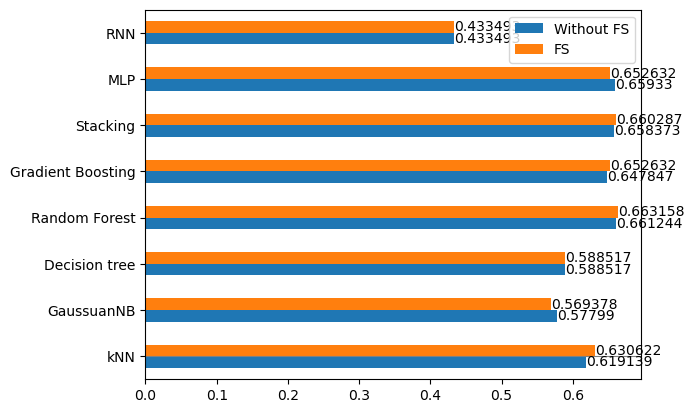

In [43]:
df = pd.DataFrame({'Without FS' : Acc1,'FS' : Acc2}, index=Model)
ax = df.plot.barh()
ax.axhline(0, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

Có thể thấy các Random Forest là model có độ chính xác cao nhất, kết tiếp là MLP. Guassian NB không mang lại kết quả cao do các feature trong tập dữ liệu không độc lập hoàn toàn với nhau và không tuân theo phân phối Gaussian. Và thấp nhất là RNN
Bên cạnh đó thì sau khi áp dụng một số kỹ thuật để tránh overfiting như điều chỉnh các hyper-parameter và feature selection thì các model như RNN, Gaussian NB, MLP và DT có sự sụt giảm độ chính xác thì các model còn lại đều ghi nhận cải thiện về độ chính xác
Có thể kết luận mô hình cho độ chính xác cao nhất là cho bài toán này là Random Forest (0.663) và MLP (0.659) sau khi áp dụng feature selection.